In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime,timedelta
from sklearn.linear_model import LinearRegression

In [5]:
Nat_gas = pd.read_csv('Nat_gas.csv')

In [7]:
Nat_gas.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [11]:
Nat_gas['Dates']=pd.to_datetime(Nat_gas['Dates'],str)
Nat_gas['Year'] = Nat_gas['Dates'].dt.year
Nat_gas['Month'] = Nat_gas['Dates'].dt.month
Nat_gas['Day'] = Nat_gas['Dates'].dt.day

In [15]:
Nat_gas.tail(12)

,Dates,Prices
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


<Axes: xlabel='Dates'>

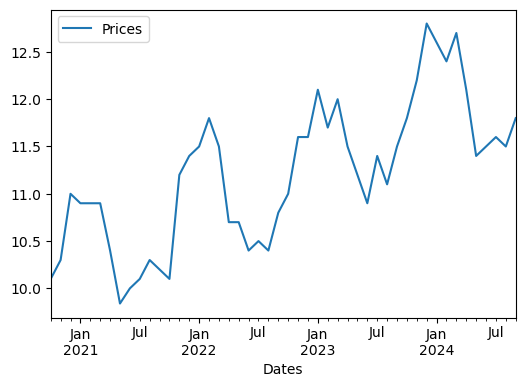

In [432]:
Nat_gas.plot('Dates','Prices',figsize=(6,4))

# Visualizing the date yields patterns including seasonal spikes at the start of each year
# and an overall increasing trend of prices.

In [434]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time

In [436]:
lin = np.polyfit(Nat_gas['time'], Nat_gas["Prices"], deg = 1)

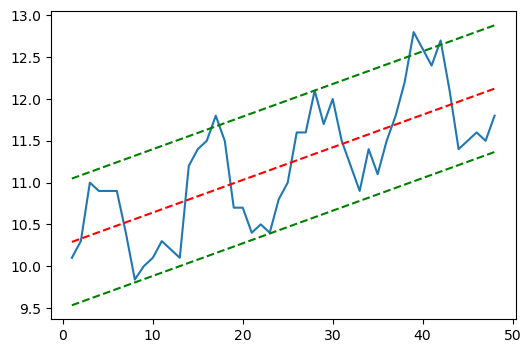

In [438]:
trend = np.polyval(lin, Nat_gas['time'])
std = Nat_gas['Prices'].std()
plt.figure(figsize=(6,4))
plt.plot(Nat_gas['time'].values, Nat_gas['Prices'].values)
plt.plot(Nat_gas['time'].values, trend, 'r--')
plt.plot(Nat_gas['time'].values, trend - std, 'g--')
plt.plot(Nat_gas['time'].values, trend + std, 'g--');

# Linear Regression Model for Extrapolation

In [340]:
def price_for_date(month,year): # Returns a predicted purchase price at the end of a given month and year
    x = np.array(Nat_gas[Nat_gas['Month'] == month]['Year']).reshape(-1,1)
    y = np.array(Nat_gas[Nat_gas['Month'] == month]['Prices'])
    reg = LinearRegression().fit(x,y)
    price = round(float(reg.predict([[year]])),1)

    return price

In [342]:
price_for_date(10,2024)

12.2

In [390]:
def prices_for_duration(start_month, start_year, end_month, end_year): # Returns array of predicted purchase prices for a given duration
    prices = []
    number_of_months = 12 - start_month + end_month + 1
    for i in range(number_of_months - end_month):
        prices.append(round(float(price_for_date(start_month+i,start_year)),1))

    for i in range(end_month):
        prices.append(round(float(price_for_date(i+1,end_year)),1))
    return prices

In [406]:
future_prices = prices_for_duration(10,2024,12,2025)
future_prices

[12.2,
 12.8,
 13.1,
 13.2,
 12.8,
 13.3,
 12.7,
 12.1,
 12.0,
 12.2,
 11.9,
 12.5,
 12.9,
 13.5,
 13.7]

In [402]:
def end_dates_for_duration(start_month, start_year, end_month, end_year): # returns array of dates in the format YYYY-MM-DD for a given duration
    end_dates = []
    
    # Start from the specified starting month and year
    current_year = start_year
    current_month = start_month
    
    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # Get the last day of the current month
        if current_month == 12:
            end_date = datetime(current_year, current_month, 31)
        else:
            end_date = datetime(current_year, current_month + 1, 1) - timedelta(days=1)
        
        end_dates.append(end_date.strftime('%Y-%m-%d'))
        
        # Move to the next month
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    
    return end_dates

In [408]:
future_dates = end_dates_for_duration(10,2024,12,2025)
future_dates

['2024-10-31',
 '2024-11-30',
 '2024-12-31',
 '2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [412]:
Nat_gas_prediction = pd.DataFrame({'Dates':future_dates,'Prices':future_prices})
Nat_gas_prediction['Dates']=pd.to_datetime(Nat_gas_prediction['Dates'])

Nat_gas_prediction['Year'] = Nat_gas_prediction['Dates'].dt.year
Nat_gas_prediction['Month'] = Nat_gas_prediction['Dates'].dt.month
Nat_gas_prediction['Day'] = Nat_gas_prediction['Dates'].dt.day

Nat_gas_prediction

,Dates,Prices,Year,Month,Day
0,2024-10-31,12.2,2024,10,31
1,2024-11-30,12.8,2024,11,30
2,2024-12-31,13.1,2024,12,31
3,2025-01-31,13.2,2025,1,31
4,2025-02-28,12.8,2025,2,28
5,2025-03-31,13.3,2025,3,31
6,2025-04-30,12.7,2025,4,30
7,2025-05-31,12.1,2025,5,31
8,2025-06-30,12.0,2025,6,30
9,2025-07-31,12.2,2025,7,31


In [420]:
Nat_gas_extended = pd.concat([Nat_gas,Nat_gas_prediction],ignore_index = True)
Nat_gas_extended.tail(16)

,Dates,Prices,Year,Month,Day,time
47,2024-09-30,11.8,2024,9,30,48.0
48,2024-10-31,12.2,2024,10,31,NaN
49,2024-11-30,12.8,2024,11,30,NaN
50,2024-12-31,13.1,2024,12,31,NaN
51,2025-01-31,13.2,2025,1,31,NaN
52,2025-02-28,12.8,2025,2,28,NaN
53,2025-03-31,13.3,2025,3,31,NaN
54,2025-04-30,12.7,2025,4,30,NaN
55,2025-05-31,12.1,2025,5,31,NaN
56,2025-06-30,12.0,2025,6,30,NaN


# Visualisation

<Axes: xlabel='Dates'>

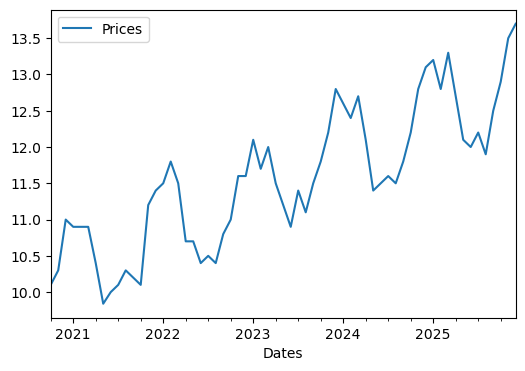

In [416]:
Nat_gas_extended.plot('Dates','Prices',figsize=(6,4))

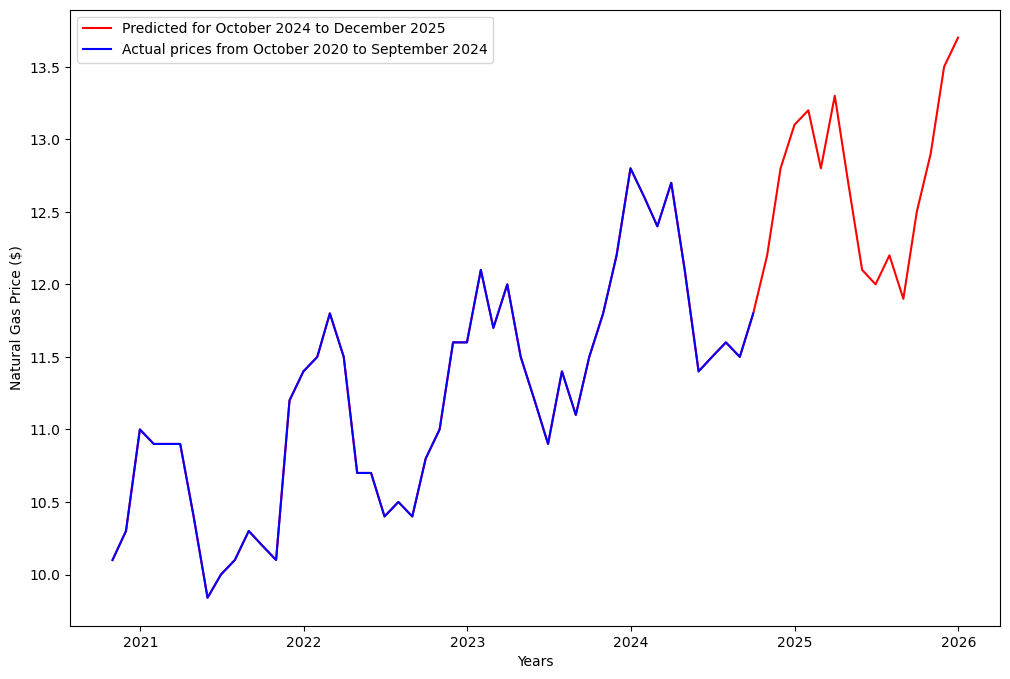

In [454]:
# Complete analytic plot

plt.figure(figsize=(12,8))
plt.plot(Nat_gas_extended['Dates'], Nat_gas_extended['Prices'], 'r',label = 'Predicted for October 2024 to December 2025')
plt.plot(Nat_gas['Dates'], Nat_gas['Prices'], 'b',label = 'Actual prices from October 2020 to September 2024')
plt.xlabel('Years')
plt.ylabel('Natural Gas Price ($)')
plt.legend()